In [ ]:
# %pip install seaborn
# %pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 52.9 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr


In [249]:
# Read data

# read the smoke estimate and annual AQI csv stored

smoke_estimates_df = pd.read_csv("../intermediary_files/smoke_estimates.csv")

asthma_df = pd.read_csv("../raw_data/Asthma/asthma_data.csv")
# Filter by county name
asthma_df = asthma_df[asthma_df['County'] == 'Alexandria']


co_poisoning_df = pd.read_csv("../raw_data/CO_poisoning/CO_poisoning_data.csv")
# Filter for state
co_poisoning_df = co_poisoning_df[co_poisoning_df['State'] == 'Virginia']

copd_hosp_df = pd.read_csv("../raw_data/COPD_hospitalization/COPD_hospitalization_data.csv")
# filter for county
copd_hosp_df = copd_hosp_df[copd_hosp_df['County'] == 'Alexandria']

ihme_mortality_resp_diseases_df = pd.read_csv("../raw_data/IHME_USA_COUNTY_RESP_DISEASE_MORTALITY_1980_2014_VIRGINIA_Y2017M09D26.CSV")


uninsured_people_df = pd.read_csv("../raw_data/Uninsured People.csv")

data_2022 = pd.read_csv("../raw_data/census_data_2022.csv", encoding="latin-1")
data_2021 = pd.read_csv("../raw_data/census_data_2011.csv", encoding="latin-1")
data_2010_2020 = pd.read_csv("../raw_data/census_data_2010_2022.csv", encoding="latin-1")


#### Census data

In [205]:

# Step 1: Filter data for Alexandria City and Virginia
alexandria_2020 = data_2010_2020[(data_2010_2020['STNAME'] == 'Virginia') & (data_2010_2020['CTYNAME'] == 'Alexandria city')]
virginia_2020 = data_2010_2020[(data_2010_2020['STNAME'] == 'Virginia') & (data_2010_2020['CTYNAME'] == 'Virginia')]

alexandria_2021 = data_2021[(data_2021['STNAME'] == 'Virginia') & (data_2021['CTYNAME'] == 'Alexandria city')]
virginia_2021 = data_2021[(data_2021['STNAME'] == 'Virginia') & (data_2021['CTYNAME'] == 'Virginia')]

alexandria_2022 = data_2022[(data_2022['STNAME'] == 'Virginia') & (data_2022['CTYNAME'] == 'Alexandria city')]
virginia_2022 = data_2022[(data_2022['STNAME'] == 'Virginia') & (data_2022['CTYNAME'] == 'Virginia')]

# Step 2: Extract columns for population and deaths
population_columns_2020 = [col for col in alexandria_2020.columns if "POPESTIMATE" in col]
death_columns_2020 = [col for col in alexandria_2020.columns if "DEATHS" in col]

population_columns_2021_2022 = [col for col in alexandria_2021.columns if "POPESTIMATE" in col]
death_columns_2021_2022 = [col for col in alexandria_2021.columns if "DEATHS" in col]

# Step 3: Melt the data into long format for populations and deaths
alexandria_population = alexandria_2020[population_columns_2020].melt(var_name="Year", value_name="Alexandria_Population")
virginia_population = virginia_2020[population_columns_2020].melt(var_name="Year", value_name="Virginia_Population")

alexandria_deaths = alexandria_2020[death_columns_2020].melt(var_name="Year", value_name="Alexandria_Deaths")
virginia_deaths = virginia_2020[death_columns_2020].melt(var_name="Year", value_name="Virginia_Deaths")

alexandria_population_2021 = alexandria_2021[population_columns_2021_2022].melt(var_name="Year", value_name="Alexandria_Population")
virginia_population_2021 = virginia_2021[population_columns_2021_2022].melt(var_name="Year", value_name="Virginia_Population")

alexandria_deaths_2021 = alexandria_2021[death_columns_2021_2022].melt(var_name="Year", value_name="Alexandria_Deaths")
virginia_deaths_2021 = virginia_2021[death_columns_2021_2022].melt(var_name="Year", value_name="Virginia_Deaths")

alexandria_population_2022 = alexandria_2022[population_columns_2021_2022].melt(var_name="Year", value_name="Alexandria_Population")
virginia_population_2022 = virginia_2022[population_columns_2021_2022].melt(var_name="Year", value_name="Virginia_Population")

alexandria_deaths_2022 = alexandria_2022[death_columns_2021_2022].melt(var_name="Year", value_name="Alexandria_Deaths")
virginia_deaths_2022 = virginia_2022[death_columns_2021_2022].melt(var_name="Year", value_name="Virginia_Deaths")

# Combine data for all years
alexandria_population = pd.concat([alexandria_population, alexandria_population_2021, alexandria_population_2022], ignore_index=True)
virginia_population = pd.concat([virginia_population, virginia_population_2021, virginia_population_2022], ignore_index=True)

alexandria_deaths = pd.concat([alexandria_deaths, alexandria_deaths_2021, alexandria_deaths_2022], ignore_index=True)
virginia_deaths = pd.concat([virginia_deaths, virginia_deaths_2021, virginia_deaths_2022], ignore_index=True)

# Step 4: Combine population and death data into a single DataFrame
census_data_filtered_2010_2022 = alexandria_population.copy()
census_data_filtered_2010_2022['Alexandria_Deaths'] = alexandria_deaths['Alexandria_Deaths']
census_data_filtered_2010_2022['Virginia_Population'] = virginia_population['Virginia_Population']
census_data_filtered_2010_2022['Virginia_Deaths'] = virginia_deaths['Virginia_Deaths']

# Step 5: Clean up 'Year' column to retain only numeric year (e.g., 2010, 2021)
census_data_filtered_2010_2022['Year'] = census_data_filtered_2010_2022['Year'].str.extract('(\d{4})').astype(int)

# Sort the data by year for better readability
census_data_filtered_2010_2022 = census_data_filtered_2010_2022.sort_values(by="Year")

# Display the final dataset
census_data_filtered_2010_2022


<>:51: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_9474/3503892562.py:51: SyntaxWarning: invalid escape sequence '\d'
  census_data_filtered_2010_2022['Year'] = census_data_filtered_2010_2022['Year'].str.extract('(\d{4})').astype(int)


,Year,Alexandria_Population,Alexandria_Deaths,Virginia_Population,Virginia_Deaths
0,2010,140737,211,8024004,14652
1,2011,144269,742,8102437,60455
2,2012,147379,682,8187456,60213
3,2013,149767,732,8255861,63446
4,2014,151544,725,8315430,62616
5,2015,153859,674,8367303,65251
6,2016,156621,719,8417651,65337
7,2017,158772,734,8471011,67942
8,2018,158377,708,8510920,68844
9,2019,159050,733,8556642,70037


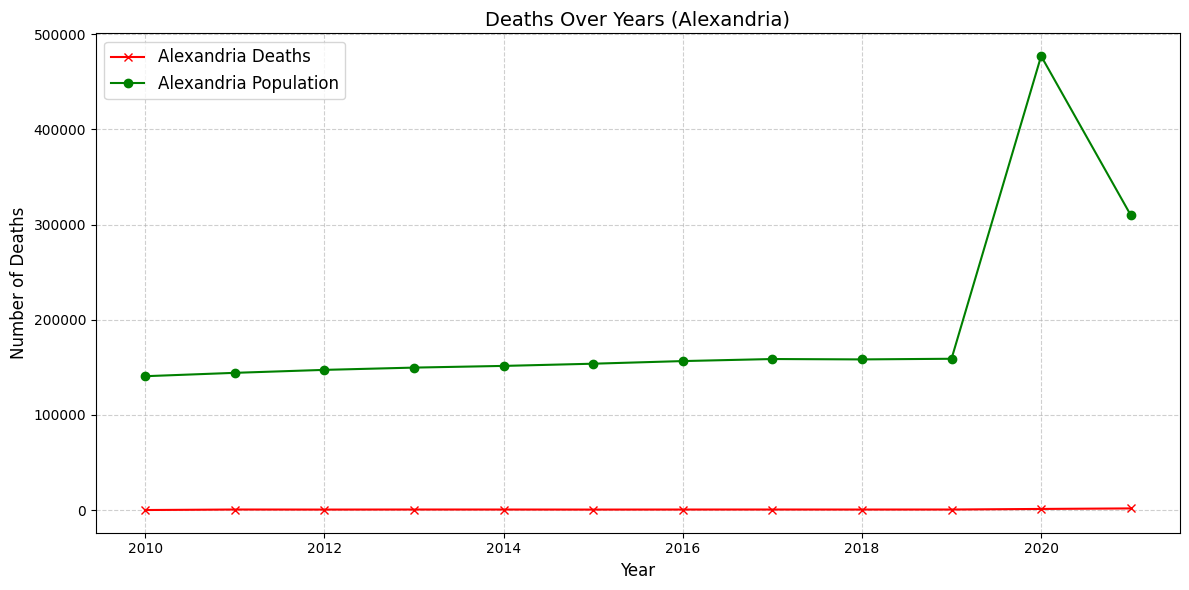

In [206]:
# births and deaths over the years for alexandria and virginia

# Group data by year (handling duplicate years)
df_grouped = census_data_filtered_2010_2022.groupby("Year").sum()

# Plotting deaths over years for Alexandria and Virginia
plt.figure(figsize=(12, 6))

# Alexandria deaths
plt.plot(
    df_grouped.index, df_grouped["Alexandria_Deaths"],
    label="Alexandria Deaths",
    color="red", marker="x", linestyle="-"
)

# Alexandria births
plt.plot(
    df_grouped.index, df_grouped["Alexandria_Population"],
    label="Alexandria Population",
    color="green", marker="o", linestyle="-"
)

# Add labels, title, and legend
plt.title("Deaths Over Years (Alexandria)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.grid(alpha=0.6, linestyle="--")

# Show the plot
plt.tight_layout()
plt.show()


#### Asthma data for Alexandria

Description: Hospitalizations for Asthma | Age-adjusted Rate of Hospitalizations for Asthma per 10,000 Population

- Year available: 2010 - 2022
- Shape of the data is:  (26, 9)
- Gender wise - Male and Female for every year we have a value
- Refer dataset footnotes for report, citation etc



In [207]:
print("shape of the data is: ", asthma_df.shape)
asthma_df.head()

shape of the data is:  (26, 9)


,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7,Gender
52,51,Virginia,51510,Alexandria,2010,6.5,NaN,NaN,Male
53,51,Virginia,51510,Alexandria,2010,10.5,NaN,NaN,Female
54,51,Virginia,51510,Alexandria,2011,5.9,NaN,NaN,Male
55,51,Virginia,51510,Alexandria,2011,10.2,NaN,NaN,Female
56,51,Virginia,51510,Alexandria,2012,6.2,NaN,NaN,Male


In [208]:
asthma_df['Year'].value_counts()

Year
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
2020    2
2021    2
2022    2
Name: count, dtype: int64

In [209]:
asthma_male_hosp_df = asthma_df[asthma_df['Gender'] == 'Male'][['Year','Value']].set_index('Year')
asthma_female_hosp_df = asthma_df[asthma_df['Gender'] == 'Female'][['Year','Value']].set_index('Year')

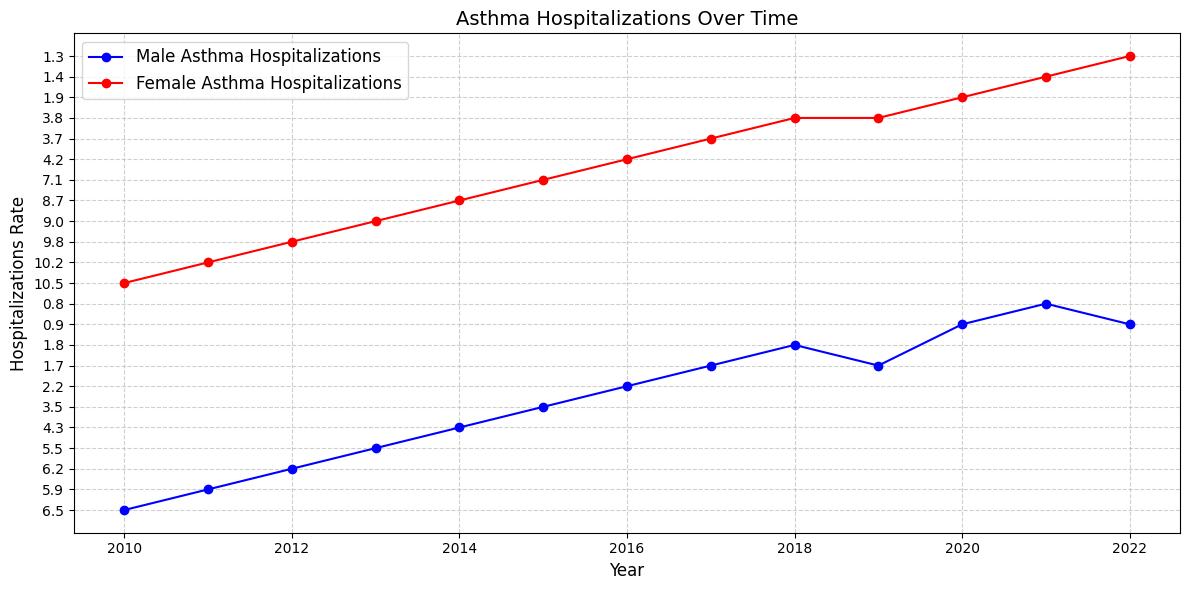

In [210]:

# Plotting
plt.figure(figsize=(12, 6))

# Plot Male Asthma Hospitalizations
plt.plot(
    asthma_male_hosp_df.index,
    asthma_male_hosp_df['Value'],
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    label='Male Asthma Hospitalizations'
)

# Plot Female Asthma Hospitalizations
plt.plot(
    asthma_female_hosp_df.index,
    asthma_female_hosp_df['Value'],
    color='red',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    label='Female Asthma Hospitalizations'
)

# Formatting the chart
plt.title('Asthma Hospitalizations Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hospitalizations Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#### CO poisoning data

- Data available for the state
- Need to map or scale it to the county
- shape of the data is:  (26, 7)
- Data available from 2010 to 2022
- Cause wise rate of hospitalization: fire or unknown intent - not necessarily wildfire

In [211]:
print("shape of the data is: ", co_poisoning_df.shape)
co_poisoning_df.head()

shape of the data is:  (26, 7)


,StateFIPS,State,Year,Value,Data Comment,Unnamed: 5,Cause
1196,51,Virginia,2010,0.11,Unstable,NaN,Cause: Fire
1197,51,Virginia,2010,0.11,Unstable,NaN,Cause: Unknown Mechanism or Intent
1198,51,Virginia,2011,0.15,NaN,NaN,Cause: Fire
1199,51,Virginia,2011,0.14,Unstable,NaN,Cause: Unknown Mechanism or Intent
1200,51,Virginia,2012,0.10,Unstable,NaN,Cause: Fire


In [212]:
co_poisoning_df['Year'].value_counts()

Year
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
2020    2
2021    2
2022    2
Name: count, dtype: int64

In [213]:
census_data_filtered_2010_2022

,Year,Alexandria_Population,Alexandria_Deaths,Virginia_Population,Virginia_Deaths
0,2010,140737,211,8024004,14652
1,2011,144269,742,8102437,60455
2,2012,147379,682,8187456,60213
3,2013,149767,732,8255861,63446
4,2014,151544,725,8315430,62616
5,2015,153859,674,8367303,65251
6,2016,156621,719,8417651,65337
7,2017,158772,734,8471011,67942
8,2018,158377,708,8510920,68844
9,2019,159050,733,8556642,70037


In [214]:
co_poisoning_df_scaled = pd.merge(
    co_poisoning_df,
    census_data_filtered_2010_2022,
    how="left",
    left_on="Year",
    right_on="Year"
)

# Scale the "Value" field using Alexandria's and Virginia's populations
co_poisoning_df_scaled['Alexandria_Scaled_Value'] = (
    co_poisoning_df_scaled['Value'] * (co_poisoning_df_scaled['Alexandria_Population']/co_poisoning_df_scaled['Virginia_Population'])
)

co_poisoning_df_scaled.head()

,StateFIPS,State,Year,Value,Data Comment,Unnamed: 5,Cause,Alexandria_Population,Alexandria_Deaths,Virginia_Population,Virginia_Deaths,Alexandria_Scaled_Value
0,51,Virginia,2010,0.11,Unstable,NaN,Cause: Fire,140737.0,211.0,8024004.0,14652.0,0.001929
1,51,Virginia,2010,0.11,Unstable,NaN,Cause: Unknown Mechanism or Intent,140737.0,211.0,8024004.0,14652.0,0.001929
2,51,Virginia,2011,0.15,NaN,NaN,Cause: Fire,144269.0,742.0,8102437.0,60455.0,0.002671
3,51,Virginia,2011,0.14,Unstable,NaN,Cause: Unknown Mechanism or Intent,144269.0,742.0,8102437.0,60455.0,0.002493
4,51,Virginia,2012,0.10,Unstable,NaN,Cause: Fire,147379.0,682.0,8187456.0,60213.0,0.001800


In [215]:
co_poisoning_fire_hosp_df = co_poisoning_df_scaled[co_poisoning_df_scaled['Cause'] == 'Cause: Fire'][['Year','Alexandria_Scaled_Value']].set_index('Year')
co_poisoning_unk_hosp_df = co_poisoning_df_scaled[co_poisoning_df_scaled['Cause'] != 'Cause: Fire'][['Year','Alexandria_Scaled_Value']].set_index('Year')

co_poisoning_sum_hosp_df = co_poisoning_df_scaled[['Year', 'Alexandria_Scaled_Value']].groupby('Year')['Alexandria_Scaled_Value'].sum()

In [216]:
co_poisoning_unk_hosp_df

,Alexandria_Scaled_Value
Year,
2010,0.001929
2011,0.002493
2012,0.002340
2013,0.002903
2014,0.002551
2015,0.002942
2016,0.000000
2017,0.000375
2018,0.000000


In [217]:
co_poisoning_sum_hosp_df

Year
2010    0.003859
2011    0.005164
2012    0.004140
2013    0.005261
2014    0.006014
2015    0.004781
2016    0.000372
2017    0.001687
2018    0.000930
2019    0.000744
2020    0.019366
2021    0.003583
2022    0.000000
Name: Alexandria_Scaled_Value, dtype: float64

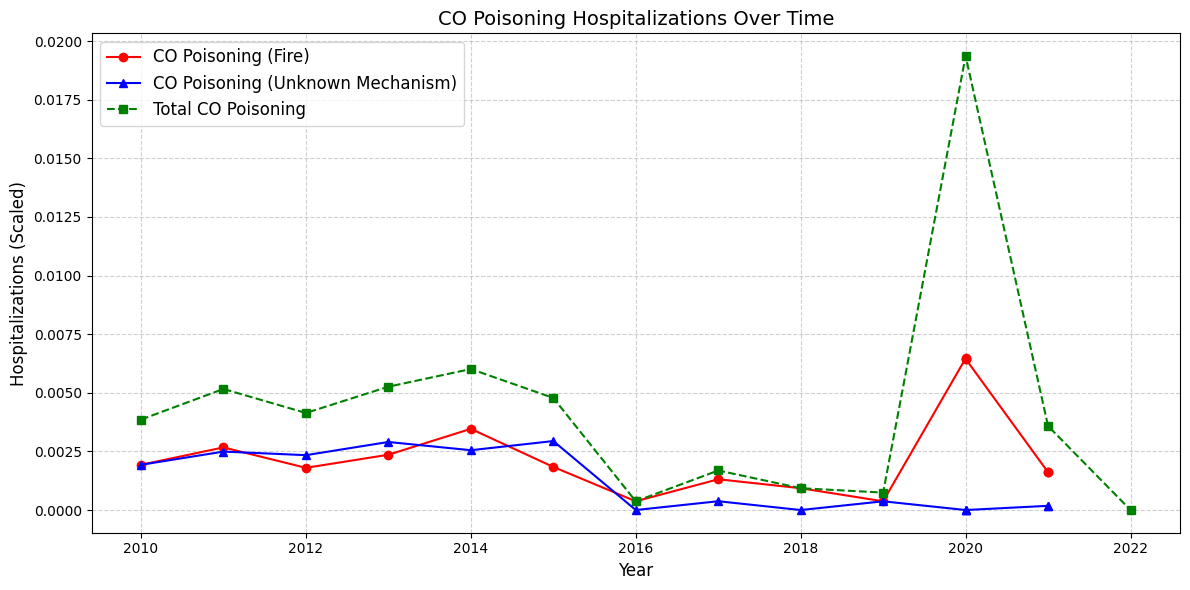

In [218]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot CO Poisoning due to Fire
plt.plot(
    co_poisoning_fire_hosp_df.index,
    co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'],
    color='red',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    label='CO Poisoning (Fire)'
)

# Plot CO Poisoning due to Unknown Mechanism or Intent
plt.plot(
    co_poisoning_unk_hosp_df.index,
    co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'],
    color='blue',
    marker='^',
    linestyle='-',
    linewidth=1.5,
    label='CO Poisoning (Unknown Mechanism)'
)

# Plot Total CO Poisoning
plt.plot(
    co_poisoning_sum_hosp_df.index,
    co_poisoning_sum_hosp_df,
    color='green',
    marker='s',
    linestyle='--',
    linewidth=1.5,
    label='Total CO Poisoning'
)

# Formatting the chart
plt.title('CO Poisoning Hospitalizations Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hospitalizations (Scaled)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


#### COPD hospitalisation

- shape of the data is:  (26, 7)
- year 2010 to 2022
- Gender wise data - same as asthma
- 

In [219]:
print("shape of the data is: ", co_poisoning_df.shape)
copd_hosp_df.head()

shape of the data is:  (26, 7)


,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7,Gender
52,51,Virginia,51510,Alexandria,2010,9.9,NaN,NaN,Male
53,51,Virginia,51510,Alexandria,2010,9.1,NaN,NaN,Female
54,51,Virginia,51510,Alexandria,2011,10.8,NaN,NaN,Male
55,51,Virginia,51510,Alexandria,2011,12.1,NaN,NaN,Female
56,51,Virginia,51510,Alexandria,2012,9.8,NaN,NaN,Male


In [220]:
copd_hosp_df['Year'].value_counts()

Year
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
2020    2
2021    2
2022    2
Name: count, dtype: int64

In [221]:
copd_male_hosp_df = copd_hosp_df[copd_hosp_df['Gender'] == 'Male'][['Year','Value']].set_index('Year')
copd_female_hosp_df = copd_hosp_df[copd_hosp_df['Gender'] == 'Female'][['Year','Value']].set_index('Year')

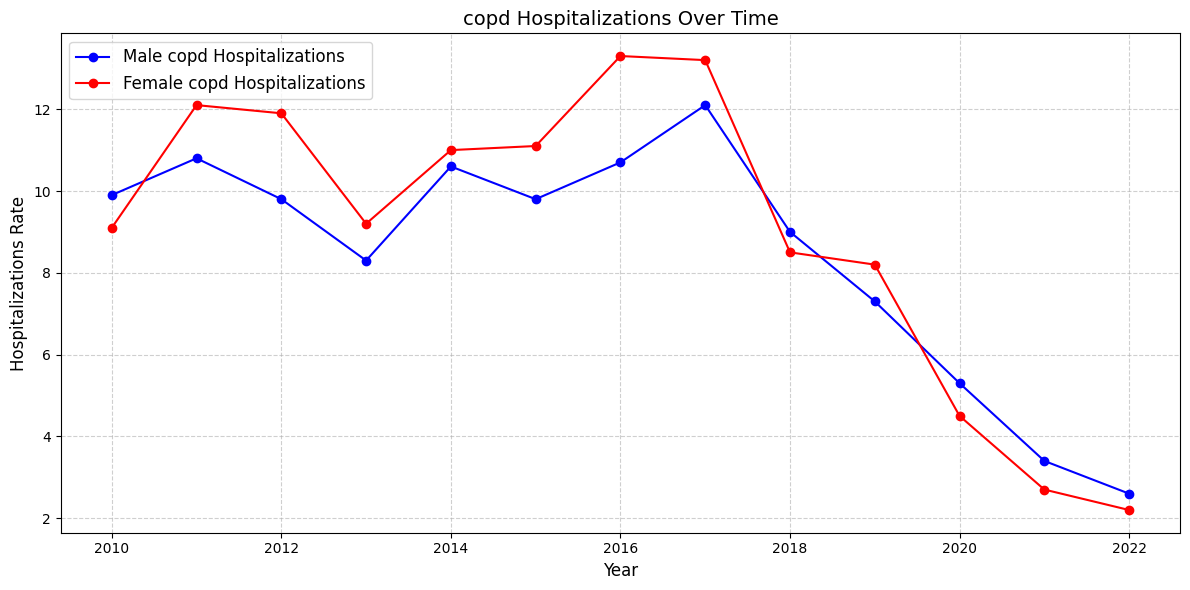

In [222]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Male copd Hospitalizations
plt.plot(
    copd_male_hosp_df.index,
    copd_male_hosp_df['Value'],
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    label='Male copd Hospitalizations'
)

# Plot Female copd Hospitalizations
plt.plot(
    copd_female_hosp_df.index,
    copd_female_hosp_df['Value'],
    color='red',
    marker='o',
    linestyle='-',
    linewidth=1.5,
    label='Female copd Hospitalizations'
)

# Formatting the chart
plt.title('copd Hospitalizations Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hospitalizations Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Mortality data - IHME

- data available from 1980-2014
- Causes of death: 'Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'

- 


In [223]:
# ihme_mortality_resp_diseases_df.to_csv("../raw_data/mortality_respiratory_diseases.csv")

In [224]:
ihme_mortality_resp_diseases_df.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
0,1,Deaths,569,Virginia,51,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,75.987977,73.526281,78.306861
1,1,Deaths,569,Virginia,51,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,75.134218,72.724434,77.449527
2,1,Deaths,569,Virginia,51,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,74.182645,71.939490,76.395129
3,1,Deaths,569,Virginia,51,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,75.117868,72.910668,77.289156
4,1,Deaths,569,Virginia,51,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,75.279177,73.103803,77.318773


In [225]:
ihme_mortality_resp_diseases_df['cause_name'].unique()

array(['Chronic respiratory diseases',
       'Chronic obstructive pulmonary disease', 'Pneumoconiosis',
       'Silicosis', 'Asbestosis', 'Coal workers pneumoconiosis',
       'Other pneumoconiosis', 'Asthma',
       'Interstitial lung disease and pulmonary sarcoidosis',
       'Other chronic respiratory diseases'], dtype=object)

In [226]:
ihme_mortality_resp_diseases_df['year_id'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [227]:
# standardized age - future work get age wise data
mortality_resp_diseases_alexandria_df = ihme_mortality_resp_diseases_df[ihme_mortality_resp_diseases_df['location_name'] == 'Alexandria City']

#### Smoke estimates

- year available: 1961-2020
- group by year - mean, max, min

In [250]:
smoke_estimates_df.head()

,Unnamed: 0.1,Unnamed: 0,year,name,size,type,circleness_scale,avg_distance,perimeter_start,shortest_distance,shortest_latlon,fire_type_encoded,smoke_estimate
0,13778,1961-13778-W_C_H_4_3_W1_61 (2),1961,W_C_H_4_3_W1_61 (2),28.693900,Wildfire,0.648984,426.356838,"(35.675731798257715, -83.71589029532807)",426.159008,"(35.67698964517509, -83.70966687469813)",5,0.193407
1,13792,1961-13792-FALL BRANC (2),1961,FALL BRANC (2),13.973044,Wildfire,0.580768,428.070862,"(35.658386536996765, -83.73666367421406)",427.994728,"(35.658889182769094, -83.7342160693799)",5,0.088211
2,13809,1961-13809-WORLEY KNO (2),1961,WORLEY KNO (2),6.655655,Wildfire,0.745906,420.876349,"(35.46030766855338, -83.41782178915307)",420.797336,"(35.460386527612144, -83.41673215456898)",5,0.049266
3,13810,1961-13810-CW_H_4_2_W12_61 (2),1961,CW_H_4_2_W12_61 (2),6.387265,Wildfire,0.761103,439.836810,"(35.60967334366376, -83.9442967311793)",439.793960,"(35.60967334366376, -83.9442967311793)",5,0.045788
4,13836,1961-13836-FOOTHILLS (2),1961,FOOTHILLS (2),1.527601,Wildfire,0.782713,435.545571,"(35.670698246564235, -83.90266194869604)",435.501251,"(35.671137177075195, -83.90149204817143)",5,0.011248


In [251]:
smoke_estimates_df['year'].unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [252]:
smoke_estimates_df = smoke_estimates_df.groupby('year')['smoke_estimate'].mean()

smoke_estimates_df

year
1961     0.167383
1962     6.096890
1963     8.177903
1964     0.150089
1965     0.235114
1966     0.069257
1967     0.997449
1968     0.789350
1969     0.528641
1970     1.948496
1971     1.670289
1972     0.091170
1973     0.241034
1974     0.232841
1975     0.217733
1976     0.403352
1977     0.705933
1978     1.133789
1979     0.400432
1980     1.503642
1981     0.339768
1982     0.169309
1983     0.265882
1984     0.301352
1985     9.933734
1986     5.208134
1987    14.344790
1988     1.562067
1989     2.056334
1990     1.335250
1991    11.481725
1992     1.787157
1993     0.794031
1994     2.627775
1995     1.460549
1996     0.721129
1997     1.128573
1998     1.429996
1999     4.312745
2000     4.785781
2001     3.680451
2002     3.504561
2003     1.388726
2004     2.583652
2005     2.391969
2006     2.194324
2007     3.178286
2008     3.227927
2009     2.120966
2010     1.867397
2011     5.803643
2012     3.229545
2013     1.327063
2014     1.328153
2015     1.124637
2016 

We filter for the years after 2010 as rest of the health data we have is from 2010

In [255]:
smoke_estimates_after_2010_df = smoke_estimates_df.loc[2010:]

# we need the cumulative smoke estimate for the year for our correlation we can find mean and min max from the grouped year.

# annual_mean_smoke_estimate = smoke_estimates_after_2010_df[['year', 'smoke_estimate']].groupby('year')['smoke_estimate'].mean()


In [257]:
annual_mean_smoke_estimate = smoke_estimates_after_2010_df

In [ ]:
# annual_min_smoke_estimate

Series([], Name: smoke_estimate, dtype: float64)

In [ ]:
# annual_max_smoke_estimate

Series([], Name: smoke_estimate, dtype: float64)

### Correlations

In [258]:
# smoke estimates with asthma hospitalization

# Male population
male_corr_mean_smoke_est = asthma_male_hosp_df['Value'].corr(annual_mean_smoke_estimate)
# male_corr_min_smoke_est = asthma_male_hosp_df['Value'].corr(annual_min_smoke_estimate)
# male_corr_max_smoke_est = asthma_male_hosp_df['Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for asthma hospitalisation in Males with mean smoke estimates: {male_corr_mean_smoke_est}")
# print(f"Correlation for asthma hospitalisation in Males with min smoke estimates: {male_corr_min_smoke_est}")
# print(f"Correlation for asthma hospitalisation in Males with max smoke estimates: {male_corr_max_smoke_est}")

# Female population
female_corr_mean_smoke_est = asthma_female_hosp_df['Value'].corr(annual_mean_smoke_estimate)
# female_corr_min_smoke_est = asthma_female_hosp_df['Value'].corr(annual_min_smoke_estimate)
# female_corr_max_smoke_est = asthma_female_hosp_df['Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for asthma hospitalisation in females with mean smoke estimates: {female_corr_mean_smoke_est}")
# print(f"Correlation for asthma hospitalisation in females with min smoke estimates: {female_corr_min_smoke_est}")
# print(f"Correlation for asthma hospitalisation in females with max smoke estimates: {female_corr_max_smoke_est}")

Correlation for asthma hospitalisation in Males with mean smoke estimates: 0.450171597578171
Correlation for asthma hospitalisation in females with mean smoke estimates: 0.4332162576041932


In [259]:
asthma_male_hosp_df

,Value
Year,
2010,6.5
2011,5.9
2012,6.2
2013,5.5
2014,4.3
2015,3.5
2016,2.2
2017,1.7
2018,1.8


In [260]:
asthma_male_hosp_df = asthma_male_hosp_df.loc[2010:2020]
asthma_female_hosp_df = asthma_female_hosp_df.loc[2010:2020]


# Convert to numeric, coercing invalid entries to NaN
asthma_male_hosp_df['Value'] = pd.to_numeric(asthma_male_hosp_df['Value'], errors='coerce')
asthma_female_hosp_df['Value'] = pd.to_numeric(asthma_female_hosp_df['Value'], errors='coerce')

annual_mean_smoke_estimate = pd.to_numeric(annual_mean_smoke_estimate, errors='coerce')


/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_9474/1214384577.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_male_hosp_df['Value'] = pd.to_numeric(asthma_male_hosp_df['Value'], errors='coerce')


In [261]:
# Male population
male_corr_mean_smoke_est, male_p_mean_smoke_est = pearsonr(asthma_male_hosp_df['Value'], annual_mean_smoke_estimate)
# male_corr_min_smoke_est, male_p_min_smoke_est = pearsonr(asthma_male_hosp_df['Value'], annual_min_smoke_estimate)
# male_corr_max_smoke_est, male_p_max_smoke_est = pearsonr(asthma_male_hosp_df['Value'], annual_max_smoke_estimate)

print(f"Correlation for asthma hospitalization in Males with mean smoke estimates: {male_corr_mean_smoke_est}, p-value: {male_p_mean_smoke_est}")
# print(f"Correlation for asthma hospitalization in Males with min smoke estimates: {male_corr_min_smoke_est}, p-value: {male_p_min_smoke_est}")
# print(f"Correlation for asthma hospitalization in Males with max smoke estimates: {male_corr_max_smoke_est}, p-value: {male_p_max_smoke_est}")

# Female population
female_corr_mean_smoke_est, female_p_mean_smoke_est = pearsonr(asthma_female_hosp_df['Value'], annual_mean_smoke_estimate)
# female_corr_min_smoke_est, female_p_min_smoke_est = pearsonr(asthma_female_hosp_df['Value'], annual_min_smoke_estimate)
# female_corr_max_smoke_est, female_p_max_smoke_est = pearsonr(asthma_female_hosp_df['Value'], annual_max_smoke_estimate)

print(f"Correlation for asthma hospitalization in Females with mean smoke estimates: {female_corr_mean_smoke_est}, p-value: {female_p_mean_smoke_est}")
# print(f"Correlation for asthma hospitalization in Females with min smoke estimates: {female_corr_min_smoke_est}, p-value: {female_p_min_smoke_est}")
# print(f"Correlation for asthma hospitalization in Females with max smoke estimates: {female_corr_max_smoke_est}, p-value: {female_p_max_smoke_est}")


Correlation for asthma hospitalization in Males with mean smoke estimates: 0.450171597578171, p-value: 0.16471508885599295
Correlation for asthma hospitalization in Females with mean smoke estimates: 0.43321625760419313, p-value: 0.18318424736001176


There is a moderate positive relationship between mean smoke estimates and male asthma hospitalizations, but the result is not statistically significant. This means the observed correlation could have occurred by chance, and we cannot confidently claim a strong linear relationship.

In [262]:
# smoke estimates with CO poisoning hospitalization

# Cause was fire
co_poisoning_fire_mean_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_mean_smoke_estimate)
# co_poisoning_fire_min_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_min_smoke_estimate)
# co_poisoning_fire_max_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation with cause of fire with mean smoke estimates: {co_poisoning_fire_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of fire with min smoke estimates: {co_poisoning_fire_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of fire with max smoke estimates: {co_poisoning_fire_max_smoke_est}")


# Cause was unknown
co_poisoning_unk_mean_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_mean_smoke_estimate)
# co_poisoning_unk_min_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_min_smoke_estimate)
# co_poisoning_unk_max_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation with cause of unk with mean smoke estimates: {co_poisoning_unk_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of unk with min smoke estimates: {co_poisoning_unk_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of unk with max smoke estimates: {co_poisoning_unk_max_smoke_est}")

# Sum of causes
co_poisoning_sum_mean_smoke_est = co_poisoning_sum_hosp_df.corr(annual_mean_smoke_estimate)
# co_poisoning_sum_min_smoke_est = co_poisoning_sum_hosp_df.corr(annual_min_smoke_estimate)
# co_poisoning_sum_max_smoke_est = co_poisoning_sum_hosp_df.corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation when sum with mean smoke estimates: {co_poisoning_sum_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation when sum with min smoke estimates: {co_poisoning_sum_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation when sum with max smoke estimates: {co_poisoning_sum_max_smoke_est}")



Correlation for CO poisoning hospitalisation with cause of fire with mean smoke estimates: -0.335116610956831
Correlation for CO poisoning hospitalisation with cause of unk with mean smoke estimates: 0.3156499478519908
Correlation for CO poisoning hospitalisation when sum with mean smoke estimates: -0.20946493463534668


In [263]:
# smoke estimates with copd hospitalization

# Male population
copd_male_corr_mean_smoke_est = copd_male_hosp_df['Value'].corr(annual_mean_smoke_estimate)
# copd_male_corr_min_smoke_est = copd_male_hosp_df['Value'].corr(annual_min_smoke_estimate)
# copd_male_corr_max_smoke_est = copd_male_hosp_df['Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for copd hospitalisation in Males with mean smoke estimates: {copd_male_corr_mean_smoke_est}")
# print(f"Correlation for copd hospitalisation in Males with min smoke estimates: {copd_male_corr_min_smoke_est}")
# print(f"Correlation for copd hospitalisation in Males with max smoke estimates: {copd_male_corr_max_smoke_est}")

# Female population
copd_female_corr_mean_smoke_est = copd_female_hosp_df['Value'].corr(annual_mean_smoke_estimate)
# copd_female_corr_min_smoke_est = copd_female_hosp_df['Value'].corr(annual_min_smoke_estimate)
# copd_female_corr_max_smoke_est = copd_female_hosp_df['Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for copd hospitalisation in females with mean smoke estimates: {copd_female_corr_mean_smoke_est}")
# print(f"Correlation for copd hospitalisation in females with min smoke estimates: {copd_female_corr_min_smoke_est}")
# print(f"Correlation for copd hospitalisation in females with max smoke estimates: {copd_female_corr_max_smoke_est}")

Correlation for copd hospitalisation in Males with mean smoke estimates: 0.5328722723738952
Correlation for copd hospitalisation in females with mean smoke estimates: 0.5944642912059283


### Mortality data analysis

In [264]:
mortality_resp_diseases_alexandria_df.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
10080,1,Deaths,3405,Alexandria City,51510,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,71.639314,65.376591,77.709019
10081,1,Deaths,3405,Alexandria City,51510,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,68.430904,63.002847,74.146541
10082,1,Deaths,3405,Alexandria City,51510,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,68.362195,62.665742,74.387193
10083,1,Deaths,3405,Alexandria City,51510,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,66.891821,61.600060,72.529090
10084,1,Deaths,3405,Alexandria City,51510,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,65.500750,60.520264,70.614728


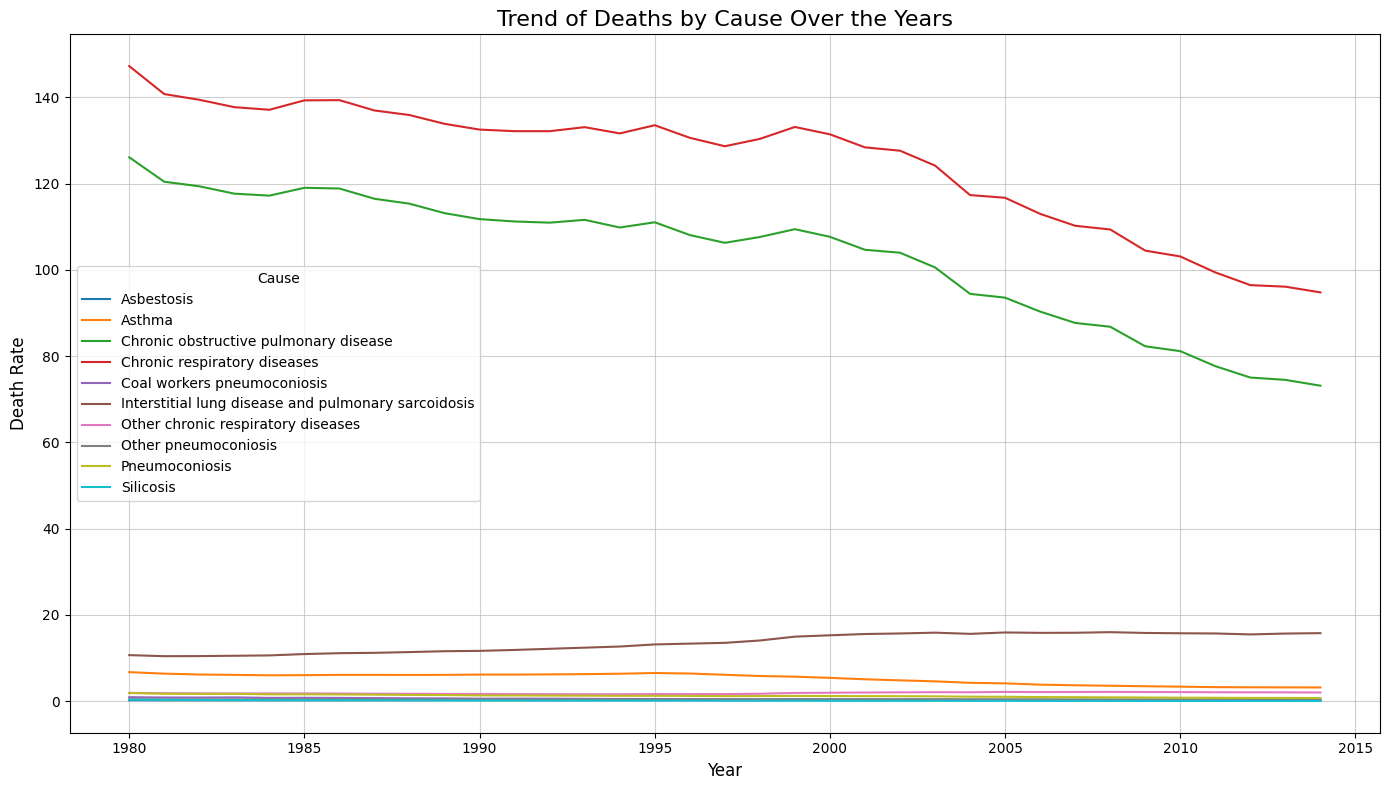

In [265]:
# Group mortality data by year and cause_name and sum the number of deaths
mortality_trend = mortality_resp_diseases_alexandria_df.groupby(['year_id', 'cause_name'])['mx'].sum().reset_index()

# Rename columns for clarity
mortality_trend.rename(columns={'year_id': 'Year', 'cause_name': 'Cause', 'mx': 'Deaths'}, inplace=True)

# Pivot the data for visualization
mortality_trend_pivot = mortality_trend.pivot(index='Year', columns='Cause', values='Deaths')

# Plotting the trend for each cause over the years
plt.figure(figsize=(14, 8))

# Plot each cause
for cause in mortality_trend_pivot.columns:
    plt.plot(mortality_trend_pivot.index, mortality_trend_pivot[cause], label=cause)

# Add titles and labels
plt.title('Trend of Deaths by Cause Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.legend(title='Cause', fontsize=10)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()


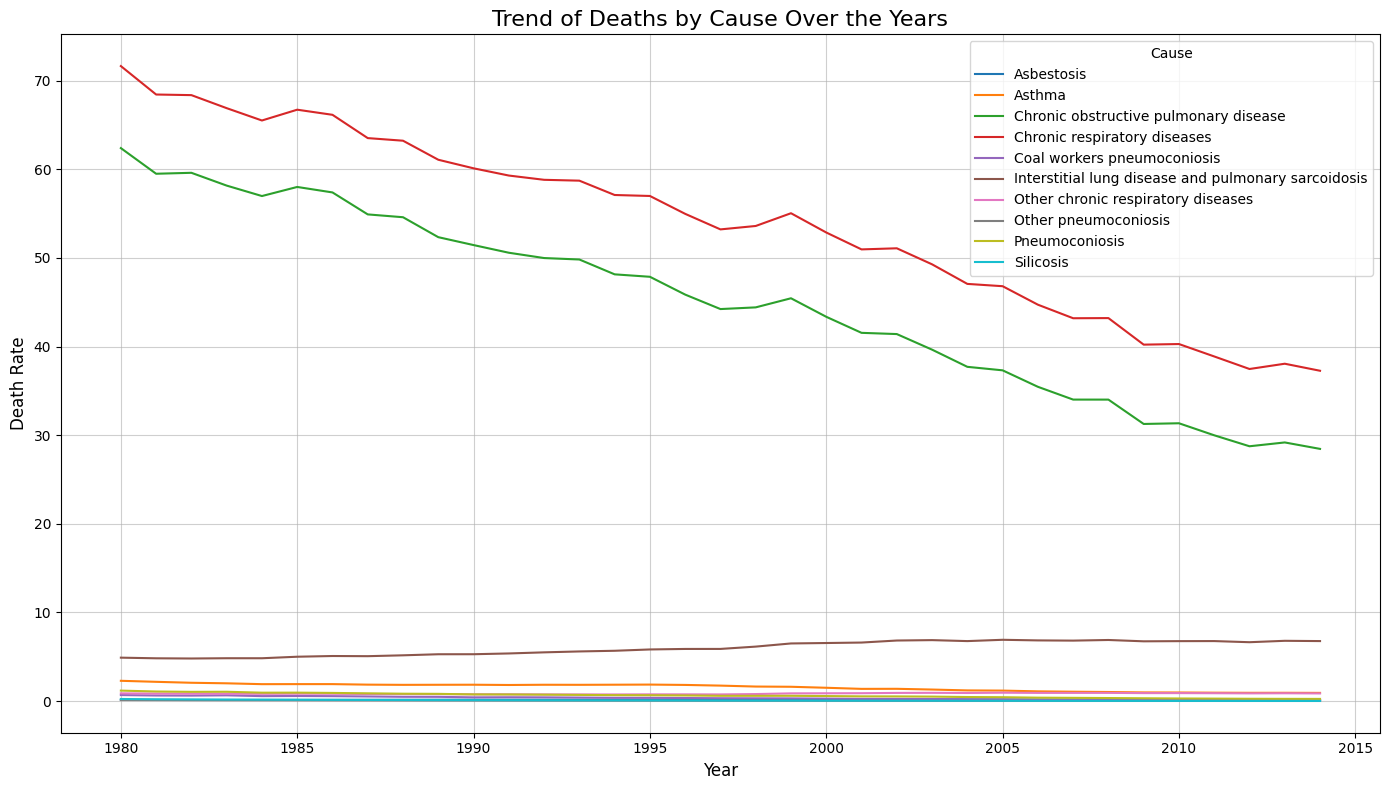

In [266]:
# mortality based on gender

# Group mortality data by year and cause_name and sum the number of deaths
mortality_male = mortality_resp_diseases_alexandria_df[mortality_resp_diseases_alexandria_df['sex'] == 'Male']
mortality_trend_male = mortality_male.groupby(['year_id', 'cause_name'])['mx'].sum().reset_index()

# Rename columns for clarity
mortality_trend_male.rename(columns={'year_id': 'Year', 'cause_name': 'Cause', 'mx': 'Deaths'}, inplace=True)

# Pivot the data for visualization
mortality_trend_male_pivot = mortality_trend_male.pivot(index='Year', columns='Cause', values='Deaths')

# Plotting the trend for each cause over the years
plt.figure(figsize=(14, 8))

# Plot each cause
for cause in mortality_trend_male_pivot.columns:
    plt.plot(mortality_trend_male_pivot.index, mortality_trend_male_pivot[cause], label=cause)

# Add titles and labels
plt.title('Trend of Deaths by Cause Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.legend(title='Cause', fontsize=10)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

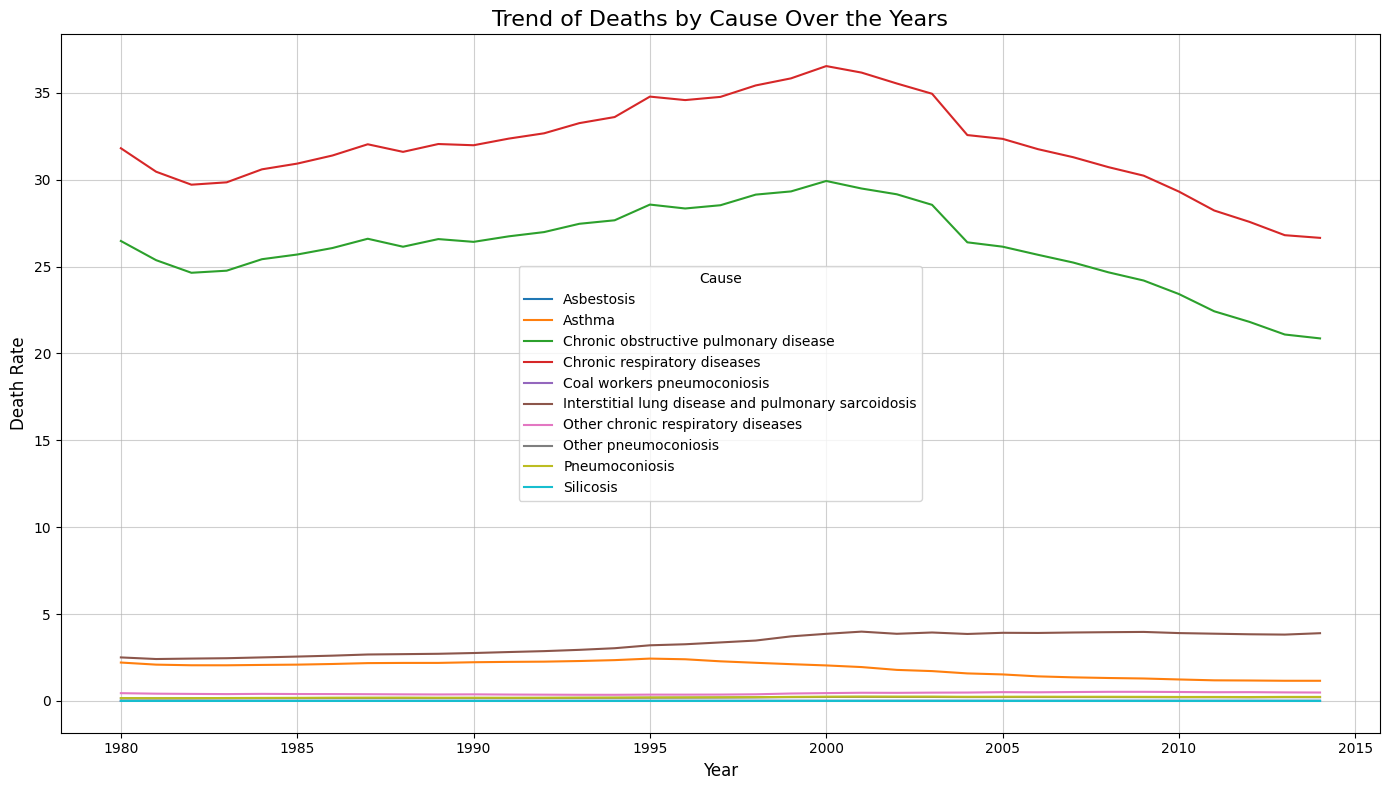

In [161]:
# Group mortality data by year and cause_name and sum the number of deaths
mortality_female = mortality_resp_diseases_alexandria_df[mortality_resp_diseases_alexandria_df['sex'] == 'Female']
mortality_trend_female = mortality_female.groupby(['year_id', 'cause_name'])['mx'].sum().reset_index()

# Rename columns for clarity
mortality_trend_female.rename(columns={'year_id': 'Year', 'cause_name': 'Cause', 'mx': 'Deaths'}, inplace=True)

# Pivot the data for visualization
mortality_trend_female_pivot = mortality_trend_female.pivot(index='Year', columns='Cause', values='Deaths')

# Plotting the trend for each cause over the years
plt.figure(figsize=(14, 8))

# Plot each cause
for cause in mortality_trend_female_pivot.columns:
    plt.plot(mortality_trend_female_pivot.index, mortality_trend_female_pivot[cause], label=cause)

# Add titles and labels
plt.title('Trend of Deaths by Cause Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Death Rate', fontsize=12)
plt.legend(title='Cause', fontsize=10)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()

/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_9474/2891515246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data_filtered.rename(columns={'year_id': 'year'}, inplace=True)


Correlation for Both: 0.004139762009655259
Correlation for Female: 0.002220945011660493
Correlation for Male: 0.008704636207053515
Correlation for Asbestosis: -1.124391020378089e-05
Correlation for Asthma: 0.03939818518468966
Correlation for Chronic obstructive pulmonary disease: 0.04578000138100957
Correlation for Chronic respiratory diseases: 0.03825970488612891
Correlation for Coal workers pneumoconiosis: 0.030822135361405264
Correlation for Interstitial lung disease and pulmonary sarcoidosis: -0.04347460214845896
Correlation for Other chronic respiratory diseases: -0.019229736032826038
Correlation for Other pneumoconiosis: 0.00793580063230646
Correlation for Pneumoconiosis: 0.02689170107704048
Correlation for Silicosis: 0.006260778576227475


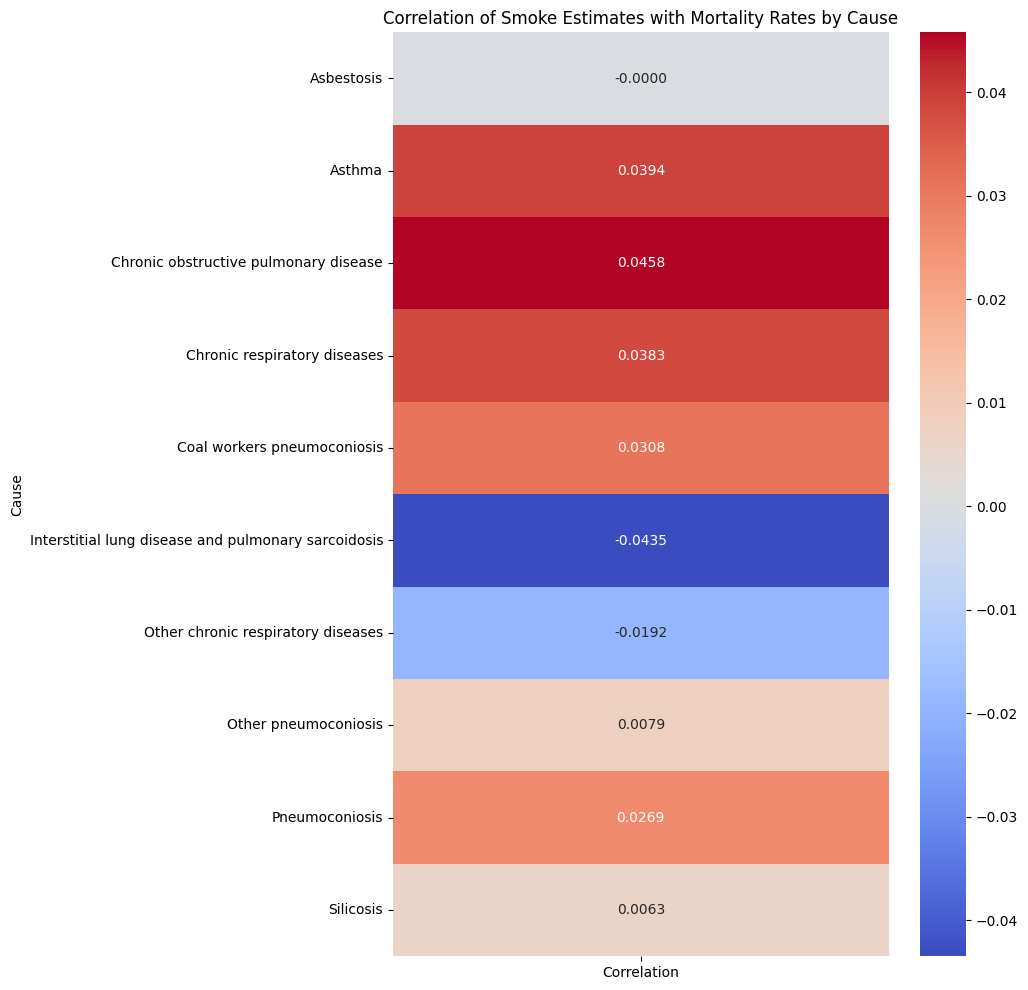

In [268]:
# Mortality data analysis

# Step 1: Prepare mortality data
mortality_data_filtered = mortality_resp_diseases_alexandria_df[['year_id', 'cause_name', 'sex', 'mx']]
mortality_data_filtered.rename(columns={'year_id': 'year'}, inplace=True)

# Step 2: Prepare smoke estimate data
smoke_data = smoke_estimates_df

# Step 3: Merge datasets
merged_data = pd.merge(mortality_data_filtered, smoke_data, on='year', how='inner')

# Step 4: Analyze correlation by gender
gender_groups = merged_data.groupby('sex')
for gender, group in gender_groups:
    correlation = group[['smoke_estimate', 'mx']].corr().iloc[0, 1]
    print(f"Correlation for {gender}: {correlation}")

# Step 5: Analyze correlation by cause
cause_groups = merged_data.groupby('cause_name')
cause_correlations = {}
for cause, group in cause_groups:
    correlation = group[['smoke_estimate', 'mx']].corr().iloc[0, 1]
    cause_correlations[cause] = correlation

# Display correlation for each cause
for cause, corr in cause_correlations.items():
    print(f"Correlation for {cause}: {corr}")


# Heatmap for cause correlations
cause_corr_df = pd.DataFrame(list(cause_correlations.items()), columns=['Cause', 'Correlation'])
cause_corr_df.set_index('Cause', inplace=True)
plt.figure(figsize=(8, 12))
sns.heatmap(cause_corr_df, annot=True, cmap='coolwarm', cbar=True, fmt=".4f")
plt.title("Correlation of Smoke Estimates with Mortality Rates by Cause")
plt.show()


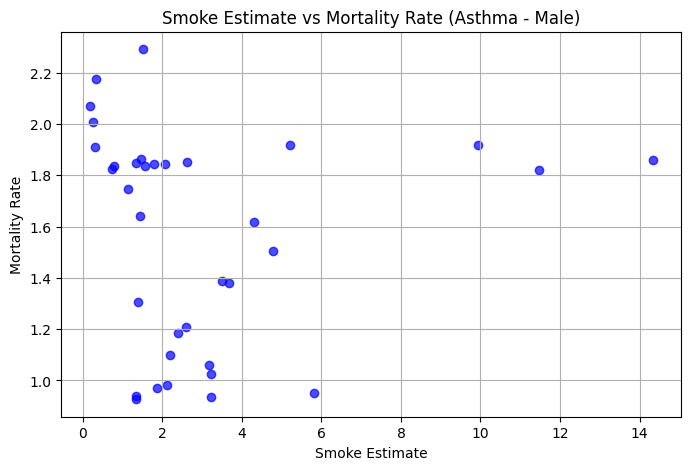

In [276]:
# Scatter plot for Asthma in Male
specific_cause = 'Asthma'
specific_gender = 'Male'
subset = merged_data[(merged_data['cause_name'] == specific_cause) & (merged_data['sex'] == specific_gender)]

plt.figure(figsize=(8, 5))
plt.scatter(subset['smoke_estimate'], subset['mx'], alpha=0.7, color='blue')
plt.title(f'Smoke Estimate vs Mortality Rate ({specific_cause} - {specific_gender})')
plt.xlabel('Smoke Estimate')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()

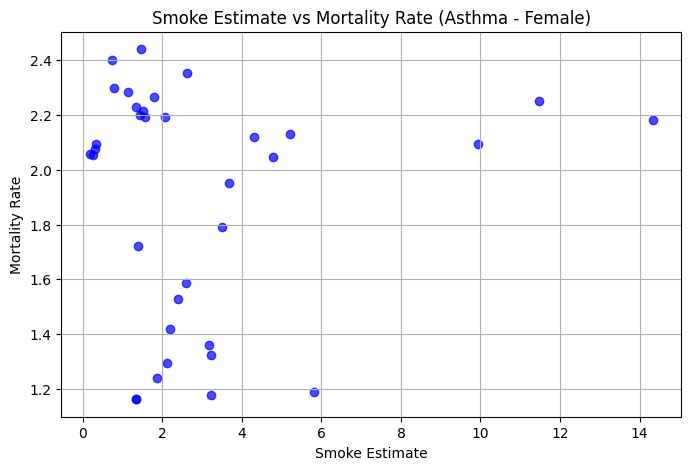

In [270]:
# Scatter plot for Asthma in Male
specific_cause = 'Asthma'
specific_gender = 'Female'
subset = merged_data[(merged_data['cause_name'] == specific_cause) & (merged_data['sex'] == specific_gender)]

plt.figure(figsize=(8, 5))
plt.scatter(subset['smoke_estimate'], subset['mx'], alpha=0.7, color='blue')
plt.title(f'Smoke Estimate vs Mortality Rate ({specific_cause} - {specific_gender})')
plt.xlabel('Smoke Estimate')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()

/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_9474/1294313378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_data_filtered.rename(columns={'year_id': 'year'}, inplace=True)


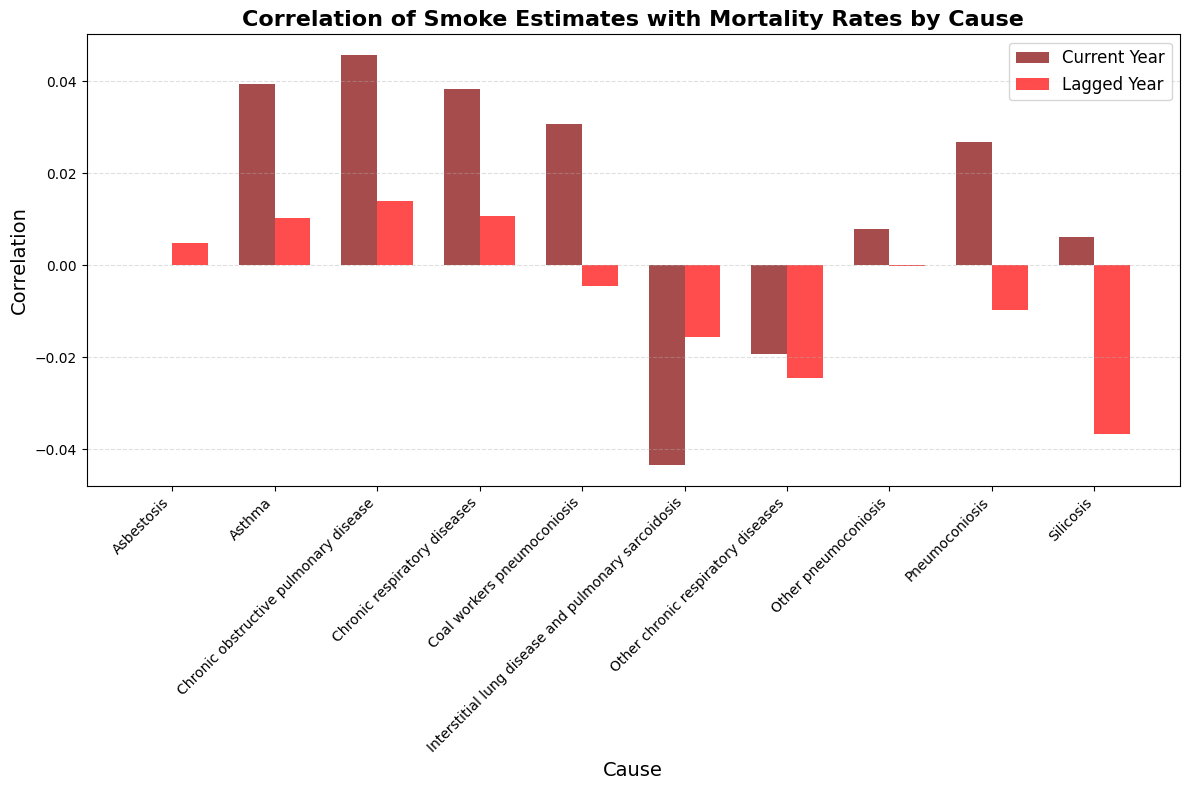

In [284]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare mortality data
mortality_data_filtered = mortality_resp_diseases_alexandria_df[['year_id', 'cause_name', 'sex', 'mx']]
mortality_data_filtered.rename(columns={'year_id': 'year'}, inplace=True)

# Step 2: Prepare smoke estimate data with lag
smoke_data = smoke_estimates_df.reset_index().copy()
smoke_data['smoke_estimate_lagged'] = smoke_data['smoke_estimate'].shift(1)

# Step 3: Merge datasets
merged_data = pd.merge(mortality_data_filtered, smoke_data, on='year', how='inner')

# Step 4: Analyze correlations (current and lagged) by cause
cause_groups = merged_data.groupby('cause_name')
cause_correlations = {}
cause_lagged_correlations = {}

for cause, group in cause_groups:
    # Current year correlation
    current_correlation = group[['smoke_estimate', 'mx']].corr().iloc[0, 1]
    # Lagged year correlation
    lagged_correlation = group[['smoke_estimate_lagged', 'mx']].corr().iloc[0, 1]
    cause_correlations[cause] = current_correlation
    cause_lagged_correlations[cause] = lagged_correlation

# Step 5: Combine into a single DataFrame
correlation_df = pd.DataFrame({
    'Current Year': cause_correlations,
    'Lagged Year': cause_lagged_correlations
}).reset_index().rename(columns={'index': 'Cause'})

# Step 6: Create grouped bar plot
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = range(len(correlation_df))

plt.bar(x, correlation_df['Current Year'], width=bar_width, label='Current Year', color='maroon', alpha=0.7)
plt.bar([i + bar_width for i in x], correlation_df['Lagged Year'], width=bar_width, label='Lagged Year', color='red', alpha=0.7)

# Add labels, title, and legend
plt.xticks([i + bar_width / 2 for i in x], correlation_df['Cause'], rotation=45, ha='right', fontsize=10)
plt.title('Correlation of Smoke Estimates with Mortality Rates by Cause', fontsize=16, fontweight='bold')
plt.xlabel('Cause', fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.4, linestyle='--')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [ ]:
# smoke estimates with CO poisoning hospitalization

# Cause was fire
co_poisoning_fire_mean_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_mean_smoke_estimate)
# co_poisoning_fire_min_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_min_smoke_estimate)
# co_poisoning_fire_max_smoke_est = co_poisoning_fire_hosp_df['Alexandria_Scaled_Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation with cause of fire with mean smoke estimates: {co_poisoning_fire_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of fire with min smoke estimates: {co_poisoning_fire_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of fire with max smoke estimates: {co_poisoning_fire_max_smoke_est}")


# Cause was unknown
co_poisoning_unk_mean_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_mean_smoke_estimate)
# co_poisoning_unk_min_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_min_smoke_estimate)
# co_poisoning_unk_max_smoke_est = co_poisoning_unk_hosp_df['Alexandria_Scaled_Value'].corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation with cause of unk with mean smoke estimates: {co_poisoning_unk_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of unk with min smoke estimates: {co_poisoning_unk_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation with cause of unk with max smoke estimates: {co_poisoning_unk_max_smoke_est}")

# Sum of causes
co_poisoning_sum_mean_smoke_est = co_poisoning_sum_hosp_df.corr(annual_mean_smoke_estimate)
# co_poisoning_sum_min_smoke_est = co_poisoning_sum_hosp_df.corr(annual_min_smoke_estimate)
# co_poisoning_sum_max_smoke_est = co_poisoning_sum_hosp_df.corr(annual_max_smoke_estimate)

print(f"Correlation for CO poisoning hospitalisation when sum with mean smoke estimates: {co_poisoning_sum_mean_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation when sum with min smoke estimates: {co_poisoning_sum_min_smoke_est}")
# print(f"Correlation for CO poisoning hospitalisation when sum with max smoke estimates: {co_poisoning_sum_max_smoke_est}")



Correlation for CO poisoning hospitalisation with cause of fire with mean smoke estimates: -0.335116610956831
Correlation for CO poisoning hospitalisation with cause of unk with mean smoke estimates: 0.3156499478519908
Correlation for CO poisoning hospitalisation when sum with mean smoke estimates: -0.20946493463534668


No long term effects of smoke

In [ ]:
# Final data creation for model building

# mortality for asthma and COPD
# Step 1: Prepare mortality data

mortality_data_filtered = mortality_resp_diseases_alexandria_df[
    (mortality_resp_diseases_alexandria_df['cause_name'] == 'Asthma') |
    (mortality_resp_diseases_alexandria_df['cause_name'] == 'Chronic obstructive pulmonary disease')
][['cause_name', 'sex', 'mx', 'year_id']]


mortality_data_filtered.rename(columns={'year_id': 'year'}, inplace=True)

# Step 2: Prepare smoke estimate data
smoke_data = smoke_estimates_df[['year', 'smoke_estimate']]

# Step 3: Merge datasets
merged_mortality_copd_asthma_data = pd.merge(mortality_data_filtered, smoke_data, on='year', how='inner')

merged_mortality_copd_asthma_data.head()

merged_mortality_copd_asthma_data.to_csv('../intermediary_files/mortality_asthma_copd.csv')

,cause_name,sex,mx,year,smoke_estimate
0,Chronic obstructive pulmonary disease,Male,62.384962,1980,6.475663
1,Chronic obstructive pulmonary disease,Male,62.384962,1980,2.913322
2,Chronic obstructive pulmonary disease,Male,62.384962,1980,2.130284
3,Chronic obstructive pulmonary disease,Male,62.384962,1980,0.851539
4,Chronic obstructive pulmonary disease,Male,62.384962,1980,0.811558


In [198]:
copd_hosp_df_final = copd_hosp_df[['Year', 'Gender', 'Value']]
copd_hosp_df_final = copd_hosp_df_final.rename(columns={'Year':'year', 'Gender':'sex', 'Value':'copd_hosp_value'})

asthma_df_final = asthma_df[['Year', 'Gender', 'Value']]
asthma_df_final = asthma_df_final.rename(columns={'Year':'year', 'Gender':'sex', 'Value':'asthma_hosp_value'})

In [199]:
copd_hosp_df_final

,year,sex,copd_hosp_value
52,2010,Male,9.9
53,2010,Female,9.1
54,2011,Male,10.8
55,2011,Female,12.1
56,2012,Male,9.8
57,2012,Female,11.9
58,2013,Male,8.3
59,2013,Female,9.2
60,2014,Male,10.6
61,2014,Female,11.0


In [200]:
merged_copd_asthma_data = pd.merge(copd_hosp_df_final, asthma_df_final, on='year', how='inner')
merged_hosp_copd_asthma_data = pd.merge(merged_copd_asthma_data, smoke_data, on='year', how='inner')

merged_hosp_copd_asthma_data.to_csv('../intermediary_files/hospitalization_asthma_copd.csv')

In [201]:
merged_hosp_copd_asthma_data

,year,sex_x,copd_hosp_value,sex_y,asthma_hosp_value,smoke_estimate
0,2010,Male,9.9,Male,6.5,30.668830
1,2010,Male,9.9,Male,6.5,8.707322
2,2010,Male,9.9,Male,6.5,2.119830
3,2010,Male,9.9,Male,6.5,22.389660
4,2010,Male,9.9,Male,6.5,16.201209
...,...,...,...,...,...,...
23219,2020,Female,4.5,Female,1.9,0.003658
23220,2020,Female,4.5,Female,1.9,0.010507
23221,2020,Female,4.5,Female,1.9,0.008430
23222,2020,Female,4.5,Female,1.9,0.001402
